In [1]:
import pandas as pd
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anthonypino/melbourne-housing-market")

print("Path to dataset files:", f"{path}/MELBOURNE_HOUSE_PRICES_LESS.csv")
df = pd.read_csv(f"{path}/MELBOURNE_HOUSE_PRICES_LESS.csv")

Path to dataset files: /Users/nikitabykov/.cache/kagglehub/datasets/anthonypino/melbourne-housing-market/versions/27/MELBOURNE_HOUSE_PRICES_LESS.csv


In [2]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,63023.0,3.110595,0.957551,1.0,3.0,3.0,4.0,31.0
Price,48433.0,997898.241488,593498.919037,85000.0,620000.0,830000.0,1220000.0,11200000.0
Postcode,63023.0,3125.673897,125.626877,3000.0,3056.0,3107.0,3163.0,3980.0
Propertycount,63023.0,7617.728131,4424.423167,39.0,4380.0,6795.0,10412.0,21650.0
Distance,63023.0,12.684829,7.592015,0.0,7.0,11.4,16.7,64.1


In [4]:
len(df["SellerG"].unique())

476

In [5]:
len(df["Date"].unique())

112

In [6]:
len(df["CouncilArea"].unique())

34

In [7]:
len(df["SellerG"].unique())

476

In [8]:
len(df["Postcode"].unique())

225

In [9]:
# Method:
# S - property sold;
# SP - property sold prior;
# PI - property passed in;
# PN - sold prior not disclosed;
# SN - sold not disclosed;
# NB - no bid;
# VB - vendor bid;
# W - withdrawn prior to auction;
# SA - sold after auction;
# SS - sold after auction price not disclosed.
# N/A - price or highest bid not available. 


In [10]:
# Type:
# br - bedroom(s);
# h - house,cottage,villa, semi,terrace;
# u - unit, duplex;
# t - townhouse;
# dev site - development site;
# o res - other residential.

In [11]:
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

# Convert date to total seconds since Unix epoch
df['Date'] = (df['Date'] - pd.Timestamp('1970-01-01')).dt.total_seconds()

In [12]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [13]:
df.count()

Suburb           63023
Address          63023
Rooms            63023
Type             63023
Price            48433
Method           63023
SellerG          63023
Date             63023
Postcode         63023
Regionname       63023
Propertycount    63023
Distance         63023
CouncilArea      63023
dtype: int64

In [14]:
df = df.dropna()

In [15]:
df.count()

Suburb           48433
Address          48433
Rooms            48433
Type             48433
Price            48433
Method           48433
SellerG          48433
Date             48433
Postcode         48433
Regionname       48433
Propertycount    48433
Distance         48433
CouncilArea      48433
dtype: int64

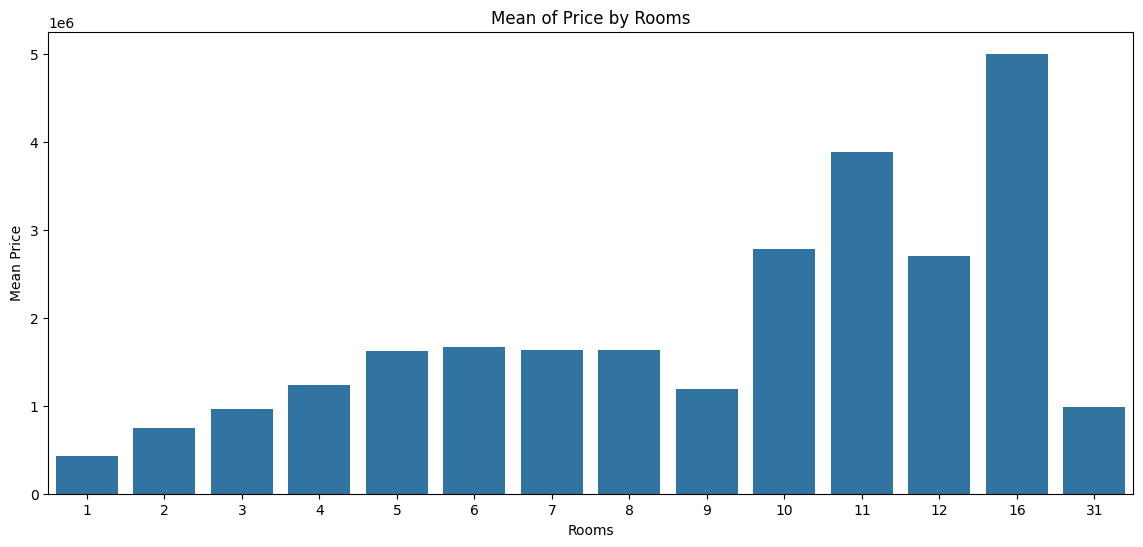

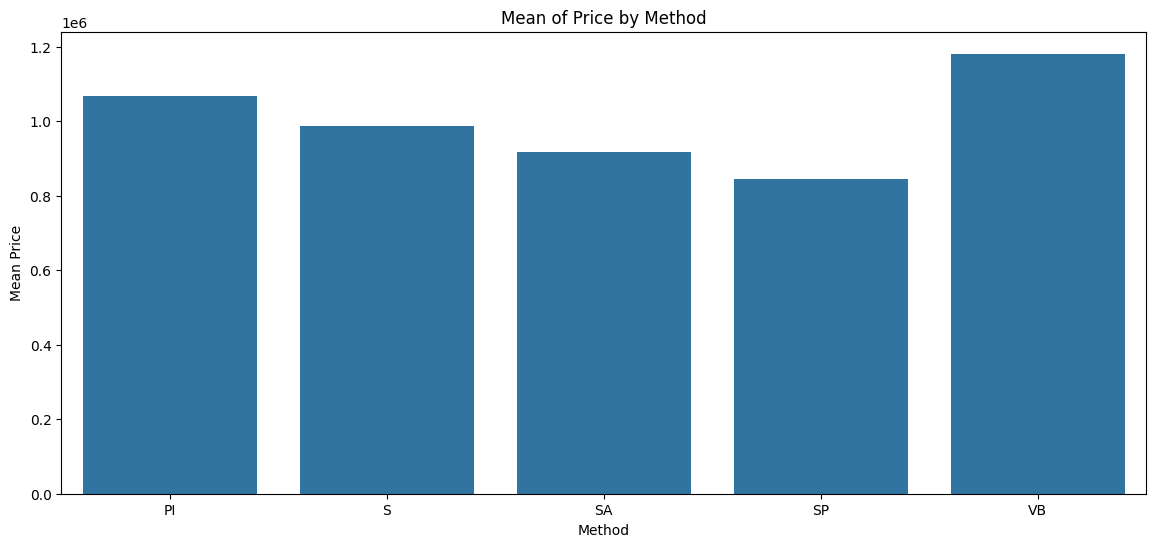

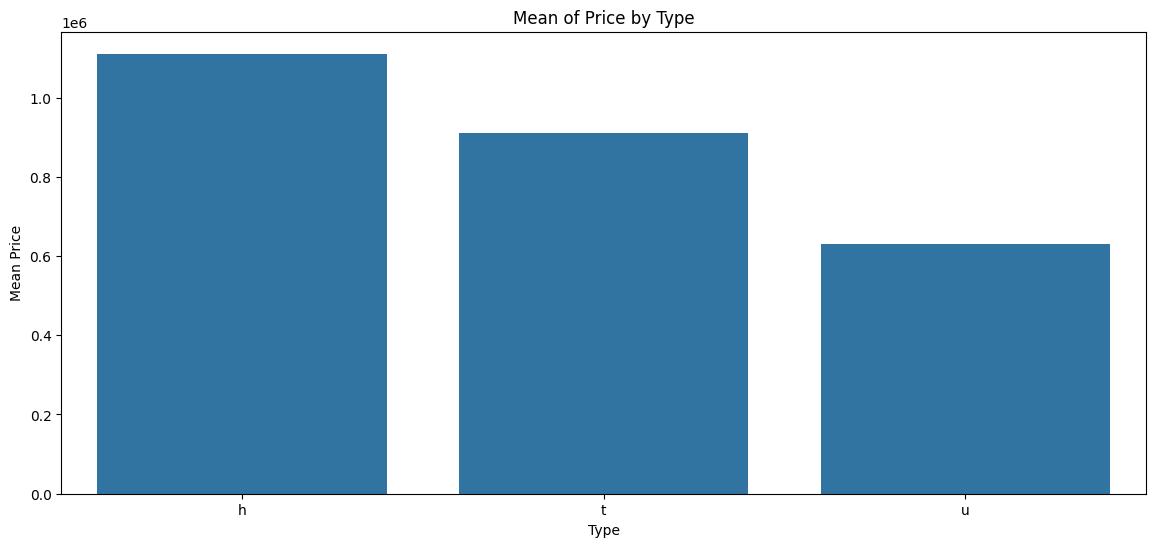

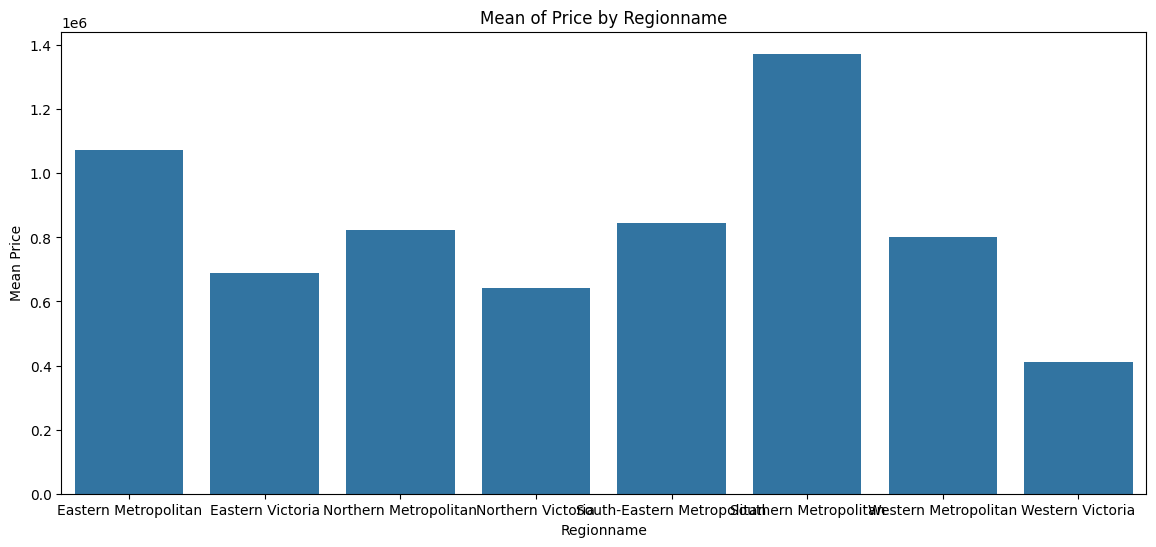

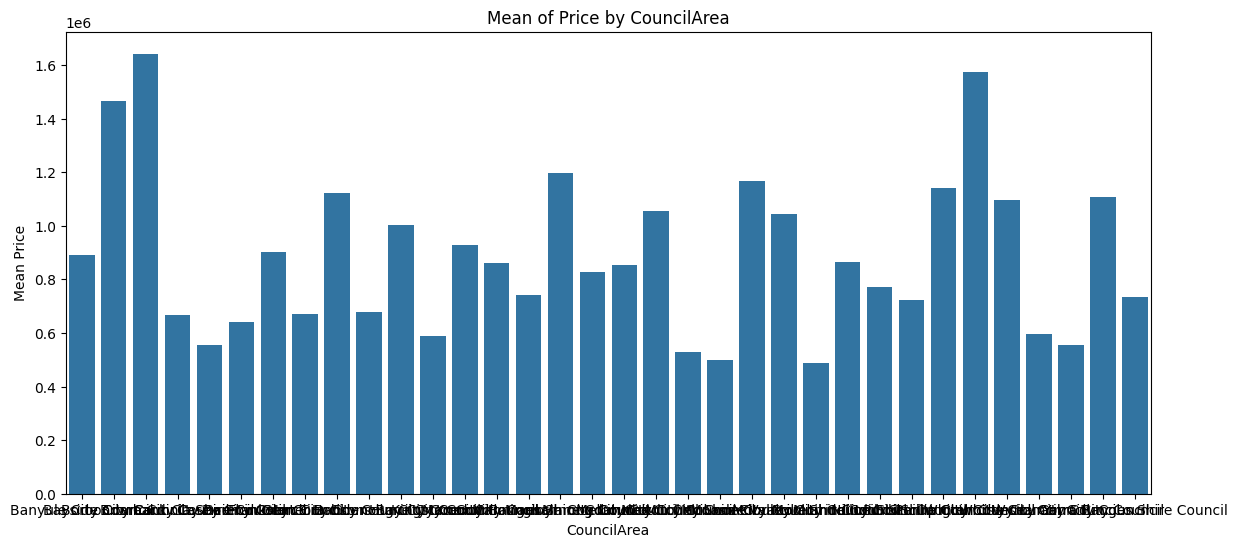

/var/folders/g9/5388270d4mqdbb4p3b8ry8880000gn/T/ipykernel_24982/3222442807.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = df_grouped_cont.groupby('x_bin')[df_target_name].mean().reset_index()


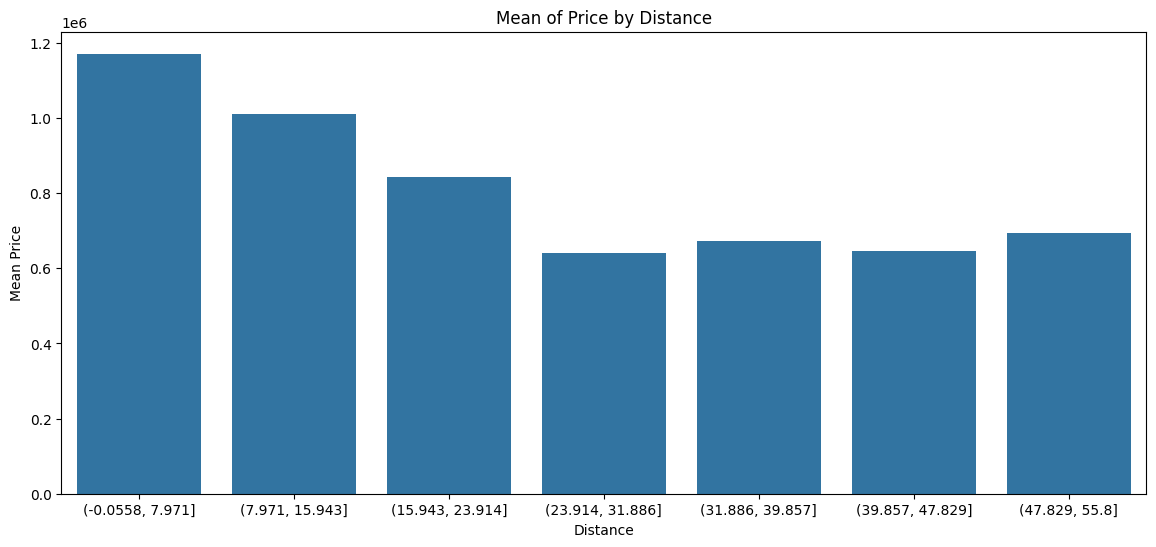

/var/folders/g9/5388270d4mqdbb4p3b8ry8880000gn/T/ipykernel_24982/3222442807.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = df_grouped_cont.groupby('x_bin')[df_target_name].mean().reset_index()


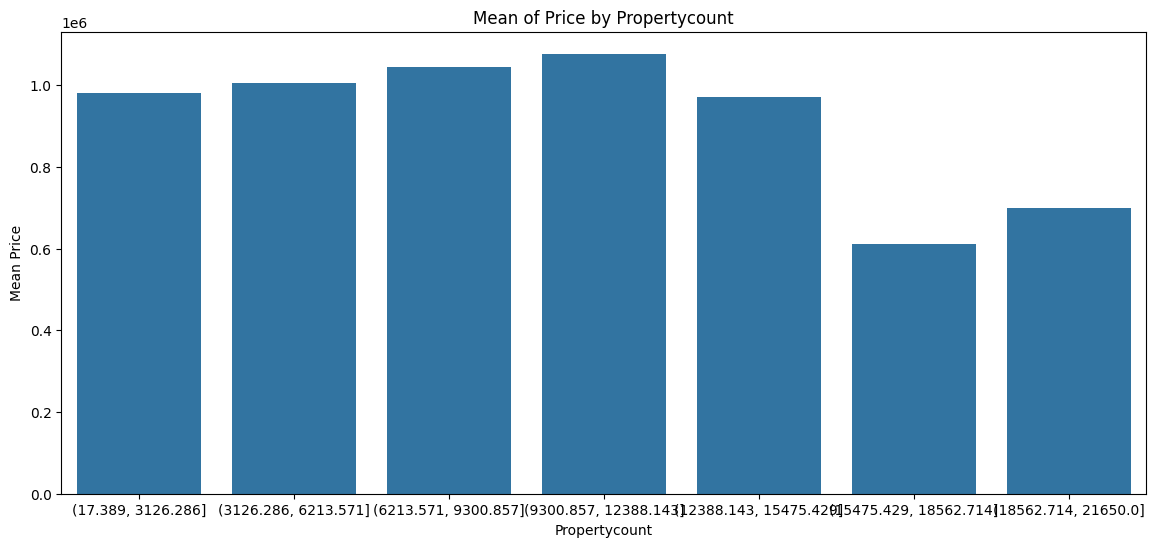

/var/folders/g9/5388270d4mqdbb4p3b8ry8880000gn/T/ipykernel_24982/3222442807.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = df_grouped_cont.groupby('x_bin')[df_target_name].mean().reset_index()


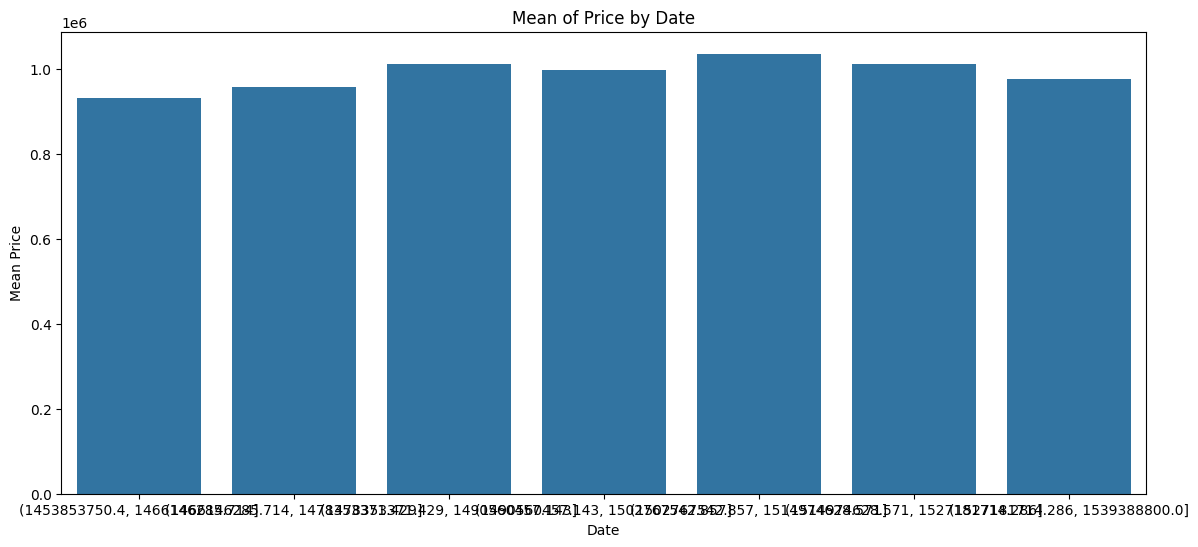

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns

df_target = df["Price"]
df_target_name = "Price"

discrete_data_columns = ["Rooms"]
continuous_data_columns = ["Distance", "Propertycount", "Date"]
number_data_columns = discrete_data_columns + continuous_data_columns
categorical_data_columns = ["Regionname", "Method", "Type"]

plt.rcParams['figure.figsize'] = (14, 6)

for column in discrete_data_columns + ["Method", "Type", "Regionname", "CouncilArea"]:
    # Calculate the mean of 'target' by 'group'
    mean_target_by_group = df.groupby(column)[df_target_name].mean()
    
    mean_target_by_group = mean_target_by_group.reset_index()

    # Plot
    sns.barplot(data=mean_target_by_group, x=column, y=df_target_name)
    plt.title(f'Mean of Price by {column}')
    plt.xlabel(column)
    plt.ylabel('Mean Price')
    plt.show()


for column in continuous_data_columns:
    # Calculate the mean of 'target' by 'group'# Bin 'x' into discrete categories
    df_grouped_cont = df.copy()
    df_grouped_cont['x_bin'] = pd.cut(df_grouped_cont[column], bins=7)
    
    # Calculate mean of 'y' for each bin
    aggregated_data = df_grouped_cont.groupby('x_bin')[df_target_name].mean().reset_index()

    # Plot
    sns.barplot(data=aggregated_data, x='x_bin', y=df_target_name)
    plt.title(f'Mean of Price by {column}')
    plt.xlabel(column)
    plt.ylabel('Mean Price')
    plt.show()
    

# sns.countplot(data=df, x='Rooms', y=df_target_name, kde=True)
# plt.title('Scatter Plot of Feature1 vs Target')
# plt.show()

# for i in range(len(df.columns)-1):
#     sns.histplot(data=df, bins=15, stat=count x=df.columns[i],hue="Price",ax=axs[i])

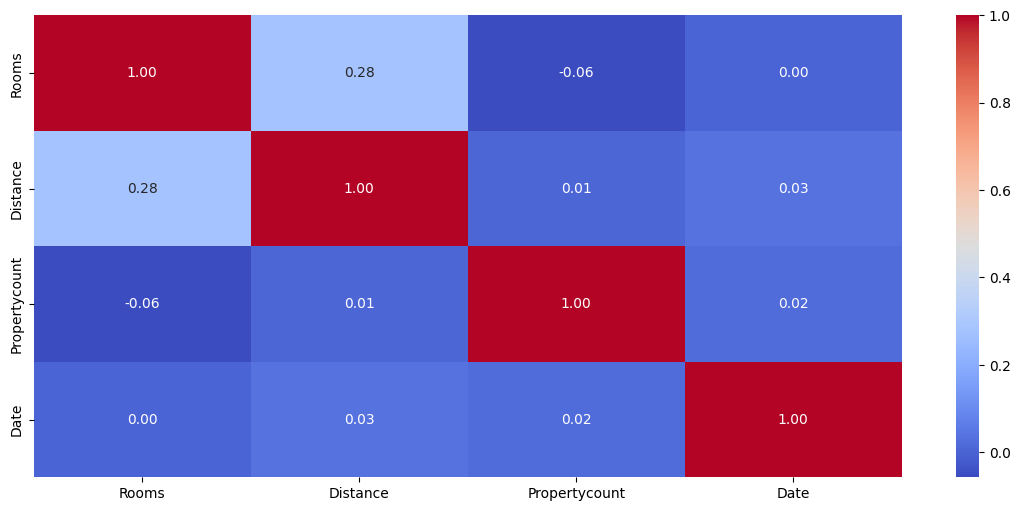

In [17]:
sns.heatmap(df[number_data_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [18]:
drop_columns = ["SellerG", "Address", "Suburb", "Postcode", "CouncilArea"]

for col in drop_columns:
    df = df.drop(col, axis=1)

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

df_encoded = pd.get_dummies(df, columns=categorical_data_columns)
print(df_encoded.columns)

target_col = df_encoded[df_target_name]
df_encoded = df_encoded.drop(df_target_name, axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_encoded, target_col, test_size = 0.25, random_state = 1)

Index(['Rooms', 'Price', 'Date', 'Propertycount', 'Distance',
       'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria', 'Method_PI', 'Method_S', 'Method_SA',
       'Method_SP', 'Method_VB', 'Type_h', 'Type_t', 'Type_u'],
      dtype='object')


In [20]:
print(df_encoded.columns)

Index(['Rooms', 'Date', 'Propertycount', 'Distance',
       'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria', 'Method_PI', 'Method_S', 'Method_SA',
       'Method_SP', 'Method_VB', 'Type_h', 'Type_t', 'Type_u'],
      dtype='object')


In [21]:
def get_top_features(coef, top_n=5):
    print("best feature")
    coef_df = pd.DataFrame({
        'Feature': df_encoded.columns,
        'Coefficient': coef
    })
    coef_df['Importance'] = np.abs(coef_df['Coefficient'])

    return coef_df.nlargest(top_n, 'Importance')

def print_metrics(model):
    y_pred_train = model.predict(X_train)
    
    rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    print(f"RMSE_train: {rmse:.2f}")
    
    y_pred_test = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    print(f"RMSE_test: {rmse:.2f}")
    
    r2 = r2_score(y_test, y_pred_test)
    print(f"R^2: {r2:.2f}")

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

dtr = DecisionTreeRegressor(max_depth=5, random_state=10)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=10)

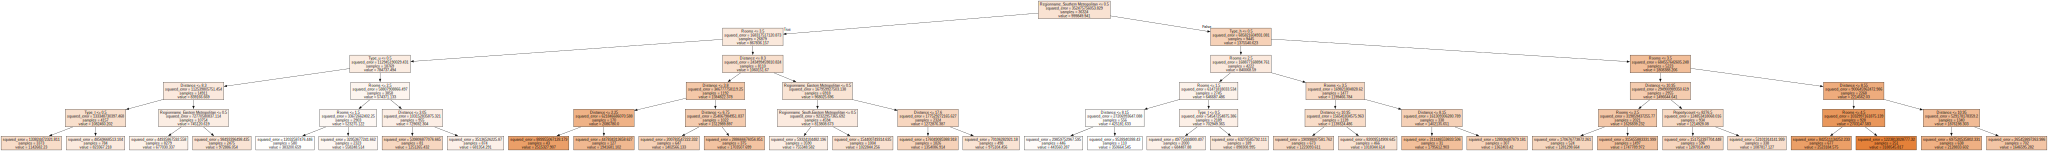

In [23]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(dtr, out_file=None,
                                feature_names=df_encoded.columns,
                                filled=True)
graphviz.Source(dot_data, format="png")

<Figure size 2500x2000 with 0 Axes>

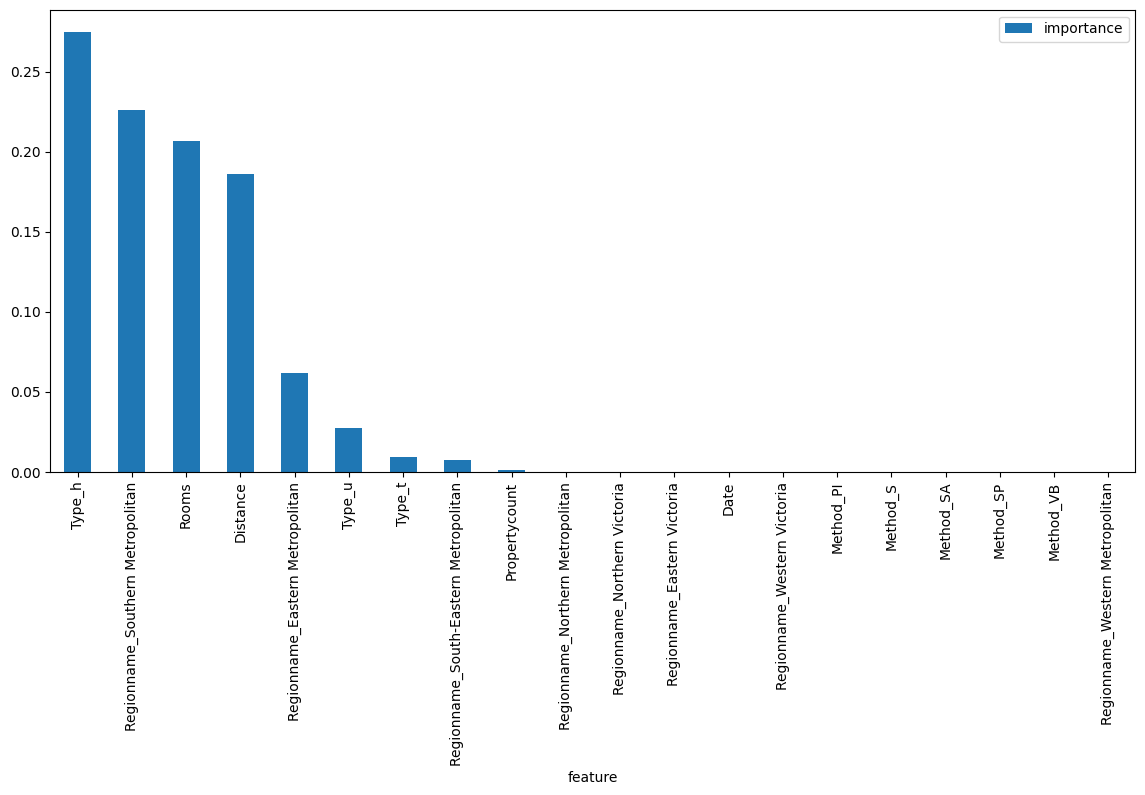

In [24]:
plt.figure(figsize=(25,20))
importance = pd.DataFrame({'feature':df_encoded.columns, 'importance': dtr.feature_importances_})
importance = importance.sort_values('importance', ascending=False).set_index('feature')
importance.plot(kind='bar', rot=90)
plt.show()

In [25]:
print_metrics(dtr)

RMSE_train: 365092.72
RMSE_test: 374810.54
R^2: 0.60


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [27]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print('coeffitients:')
print(lin_reg.coef_)
print()

print('intercept:')
print(lin_reg.intercept_)

coeffitients:
[ 2.28957153e+05  3.84166934e+04  4.20703563e+03 -2.92911120e+05
 -1.27615704e+18 -3.10742862e+17 -1.57801300e+18 -3.45872603e+17
 -9.70709935e+17 -1.54221648e+18 -1.40570444e+18 -2.12355697e+17
  9.50533874e+16  1.40073385e+17  2.51278170e+16  9.91587441e+16
  8.86245714e+16 -4.37891865e+17 -2.91239869e+17 -3.78237174e+17]

intercept:
999952.665724458


In [28]:
print_metrics(lin_reg)

RMSE_train: 406268.75
RMSE_test: 36101194190231848.00
R^2: -3708215172378070089728.00


In [29]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)

print('coeffitients:')
print(ridge.coef_)
print()

print('intercept член:')
print(ridge.intercept_)
print()

get_top_features(ridge.coef_)

coeffitients:
[ 227565.46793589   37801.71555171    4114.64535544 -291903.94562422
   23874.12797899   25134.94955575 -100365.80302589   19674.55394192
   63258.01020449  145721.72735255 -122688.7533355    -1787.06011245
   -8824.28182078    4759.7139708    -2332.40747577   -5921.86698309
    9228.61256522   89268.66393875   -8353.33868225  -96915.90091387]

intercept член:
999849.9410307235

best feature


,Feature,Coefficient,Importance
3,Distance,-291903.945624,291903.945624
0,Rooms,227565.467936,227565.467936
9,Regionname_Southern Metropolitan,145721.727353,145721.727353
10,Regionname_Western Metropolitan,-122688.753335,122688.753335
6,Regionname_Northern Metropolitan,-100365.803026,100365.803026


In [30]:
print_metrics(ridge)

RMSE_train: 406261.12
RMSE_test: 413224.24
R^2: 0.51


In [31]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=100)
lasso.fit(X_train, y_train)

print('coeffitients:')
print(lasso.coef_)
print()

print('intercept:')
print(lasso.intercept_)
print()

get_top_features(lasso.coef_)

coeffitients:
[ 228396.08203215   37894.76182562    4191.56532967 -293570.71989526
       0.           19610.39833239 -130372.11886837   13506.13040079
   45706.65084014  116666.30286829 -149517.2419192    -5464.68854603
  -12102.3001627        0.           -3070.34363631   -9130.02186071
    5975.70538908  101876.10511852      -0.          -86118.1683161 ]

intercept:
999849.9410307235

best feature


,Feature,Coefficient,Importance
3,Distance,-293570.719895,293570.719895
0,Rooms,228396.082032,228396.082032
10,Regionname_Western Metropolitan,-149517.241919,149517.241919
6,Regionname_Northern Metropolitan,-130372.118868,130372.118868
9,Regionname_Southern Metropolitan,116666.302868,116666.302868


In [32]:
print_metrics(lasso)

RMSE_train: 406257.85
RMSE_test: 413226.17
R^2: 0.51


In [33]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(random_state=1, alpha=0.1)
elastic.fit(X_train, y_train)

print('coeffitients:')
print(elastic.coef_)
print()

print('intercept:')
print(elastic.intercept_)
print()

get_top_features(elastic.coef_)

coeffitients:
[ 213087.499759     34476.75602456     580.36734191 -260589.41246288
   21453.8840018    17802.64804589  -92875.96502085   11885.98135596
   49064.12798571  145588.55624448 -114824.98703041   -5695.49287573
   -6828.34627861    3354.81987062   -2653.96722711   -7966.4893139
   11687.07282638   87307.17787717   -8382.22470807  -94622.02206083]

intercept:
999849.9410307235

best feature


,Feature,Coefficient,Importance
3,Distance,-260589.412463,260589.412463
0,Rooms,213087.499759,213087.499759
9,Regionname_Southern Metropolitan,145588.556244,145588.556244
10,Regionname_Western Metropolitan,-114824.987030,114824.987030
19,Type_u,-94622.022061,94622.022061


In [34]:
print_metrics(elastic)

RMSE_train: 407193.56
RMSE_test: 414084.26
R^2: 0.51


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = dict(n_estimators=[10, 25, 50, 100],
                  max_depth=[3, 7, 15],
                  min_samples_leaf=[2,5,20])

rf = RandomForestRegressor(bootstrap=True, random_state=0, n_jobs=2)

grid = GridSearchCV(rf, param_grid, cv=10, scoring='neg_mean_squared_error', verbose=2)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=25; total time=   0.2s
[CV] END ...max_depth=3, min_samples_leaf=2, n

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=2, random_state=0),
             param_grid={'max_depth': [3, 7, 15],
                         'min_samples_leaf': [2, 5, 20],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [36]:
rf_best = grid.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=5, n_jobs=2,
                      random_state=0)

<Figure size 2500x2000 with 0 Axes>

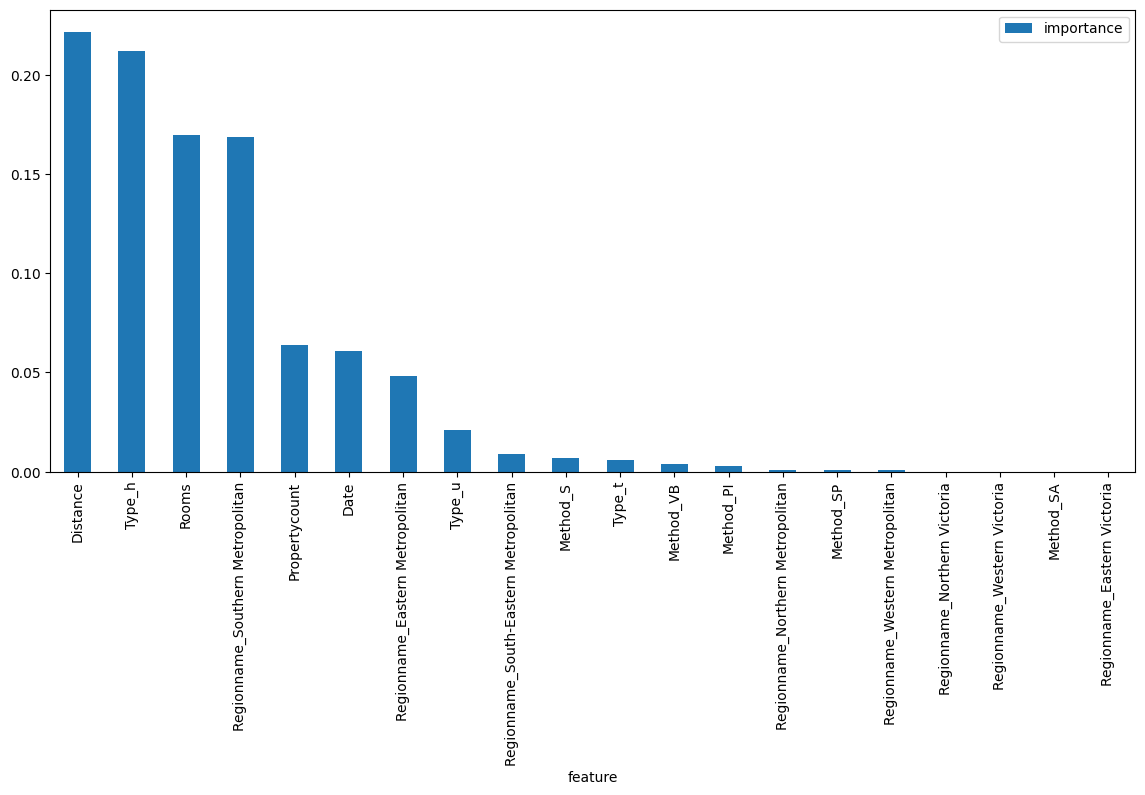

In [37]:
plt.figure(figsize=(25,20))
importance = pd.DataFrame({'feature':df_encoded.columns, 'importance': np.round(rf_best.feature_importances_,3)})
importance = importance.sort_values('importance', ascending=False).set_index('feature')
importance.plot(kind='bar', rot=90)
plt.show()

In [38]:
print_metrics(rf_best)

RMSE_train: 251771.94
RMSE_test: 318785.99
R^2: 0.71
